#Ljung-Box Q statistics:
La idea es aprender mas acerca de los datos.  Queremos saber si los datos presentan alguna correlacion. Es decir que no son independientes. Esta prueba indica el grado de independencia en los datos (variables).   Existe otra prueba mas basica el Ljung-Box (similar). A esta se le llama Box-Pierce (buscar en Wikipedia).  Comenzamos con el **Box-Pierce**.

* Se encuentra la ACF. Los coeficientes son $\hat{\rho}_k$, $k=1,2, \cdots, m$ donde $m$ es el "lag" (retardo).

* Se encuentra la suma de los cuadrados de los coeficientes de correlacion pesados con $n$ donde $n$ es el numero de datos. A esto se le llama $Q$

$$Q = n \sum_{k=1}^m \hat{\rho_k}^2 . $$

* Se estima la distribucion chi-cuadrado $\chi^2$ y usamos el $p$-value para determinar la veracidad o no de la hipostesis nula.
**Null Hypothesis** 

La hipotesis nula $H0$ es la hipotesis de que no halla algun tipo de correlacion en los datos. Es decir que los datos se comportan como ruido blanco. La hipoteis alternativa $H1$ es la hipotesis de que **si** hay correlacion entre ellos. Como  se define si la hipotesis nula procede o no. Se usa la PDF $\chi^2$ con el numero de grados de libertad. Hablemos del numero de grados de libertad.
Si ses tienen una modelo $A(p,q)$ y se tienen $m$ lags, el numero de grados de libertad es $m-p-q$. Si el modelo es, por ejemplo, AR(1) el numero de grados de libertad es $m-1$.

Para determinar si hay algun grado significativo de correlacion entre los datos (si no hay dependencia) este se observa con un humbral (threshold) que nosotros usamos como mas del 5% de probabilidad. El $p$-value es el valor de probabilidad de que la hipotesis nula $H0$ se de.  Si este valor esta, en nuestro caso, por debajo del 5%, entonces la hipotesis nula no se da y hay correlacion entre los datos. Esto lo vemos cuantitavivamente en el proximo cuaderno.



Saltemos ahora al Ljung-Box Q-statistics.  Es parecido al Box-Pierce pero la formula es:

$$Q = n(n+2)  \sum_{k=1}^m \frac{\hat{\rho_k}^2}{n-k}$$

Para clarificar esto veamos un ejemplo en Python.


Text(0.5, 1.0, 'serie autoregresiva AR(1) con $\\phi=0.3$ ')

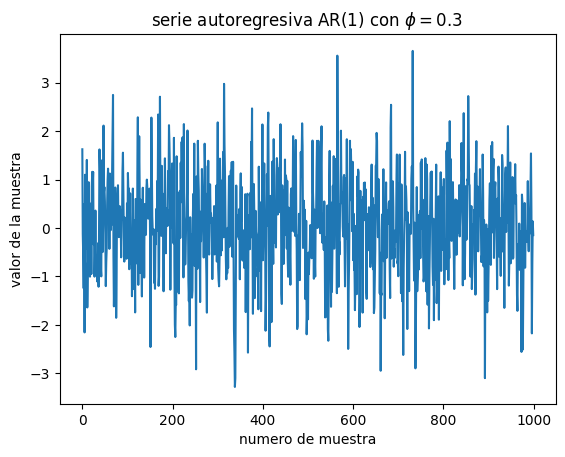

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# generemos los datos como siempre
np.random.seed(1)
mu, sigma = 0,1
N=1000
Z = np.random.normal(mu, sigma, N)

phi=0.3
X = np.zeros(N)
X[0] = Z[0]

for t in range(1, N):
    X[t] = Z[t] + phi*X[t-1]

# grafica
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.plot(X)
plt.title(f"serie autoregresiva AR(1) con $\phi={phi}$ ")

En clase vimos la autocorrelacion

$$ \rho_{\tau} = \phi^{\tau}.$$

Text(0.5, 1.0, 'ACF de AR(1) con $\\phi=0.3$ ')

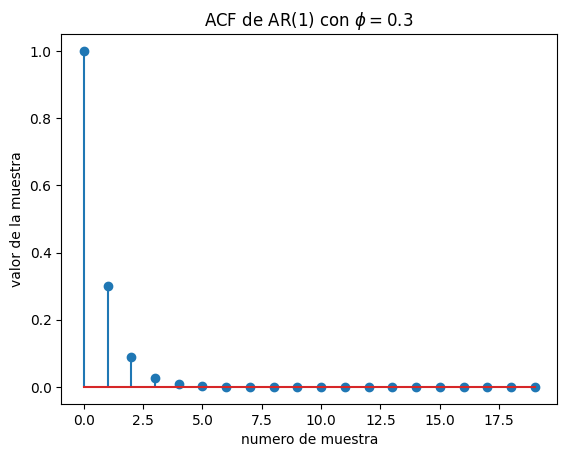

In [6]:
M=20 # numero de lags
rho = np.zeros(M)
rho = [phi**tau for tau in range(M)]
# grafica
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.stem(rho)
plt.title(f"ACF de AR(1) con $\phi={phi}$ ")

In [10]:
# Estimamos si la correlacion es significativa
# aca es donde usamos los Q tests
from scipy.stats import chi2
dof = M-1
Q = N * sum( (rho[j]**2 for j in range(1, M)))  # ? suma desde 0?
prob = 0.95  # umbral


# encontramos el p-value
# lo veremos graficamente, por ahora
# es la probabilidad de que Q mayor que 
# el valor critico
p = 1 - chi2.cdf(x=Q, df=dof)
print("p-value",p)

# set alpha to 0.05
alpha=0.05

# determinamos si la correlacion es significativa (H1) o no (H0)
if p < alpha:
    print("it did not pass the null hypothesis test p=%f, alpha=%f"%(p,alpha))
    print("there are significant correlations between lags")
else: 
    print("it did  pass the null hypothesis test p=%f, alpha=%f"%(p,alpha))
    print("there are no significant correlations between lags")

print("Q value:", Q)

p-value 8.464340339742193e-13
it did not pass the null hypothesis test p=0.000000, alpha=0.050000
there are significant correlations between lags
Q value: 98.90109890109888


## Usando ```statsmodels``` module


In [8]:
sm.stats.acorr_ljungbox(X, lags=[M], return_df=True, boxpierce=True, model_df=1)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
20,102.988873,1.534820e-13,102.474971,1.903672e-13


## Ljung-box test
$$Q = N(N+2) \sum_{j=1}^M \frac{\rho_j^2}{N-j} $$

In [13]:
dof = M-1
Q = N*(N+2)*sum( rho[j]**2/(N-j) for j in range(1, M))
print("Q=", Q)

# calculamos el valor critico para alpha=0.05
prob=0.95
critical = chi2.ppf(prob, dof)  # retorna el valor critico de"Q" dada la probabilidad


# encontramos el p-value
p = 1 - chi2.cdf(x=Q, df=dof)
print(p)

if p < alpha:
    print("it did not pass the null hypothesis test p=%f, alpha=%f"%(p,alpha))
    print("there are significant correlations between lags")
else: 
    print("it did  pass the null hypothesis test p=%f, alpha=%f"%(p,alpha))
    print("there are no significant correlations between lags")

print("Q value:", Q)

Q= 99.2079316109619
7.4495964952348e-13
it did not pass the null hypothesis test p=0.000000, alpha=0.050000
there are significant correlations between lags
Q value: 99.2079316109619


## Ahora usamos ```statsmodels```

In [30]:
sm.stats.acorr_ljungbox(X, lags=[M], return_df=True)

,lb_stat,lb_pvalue
10,92.330171,1.846005e-15


## graficamos los resultados sobre la funcion $\chi^2$.

valor critico es 
 30.14352720564616
Q= 99.2079316109619


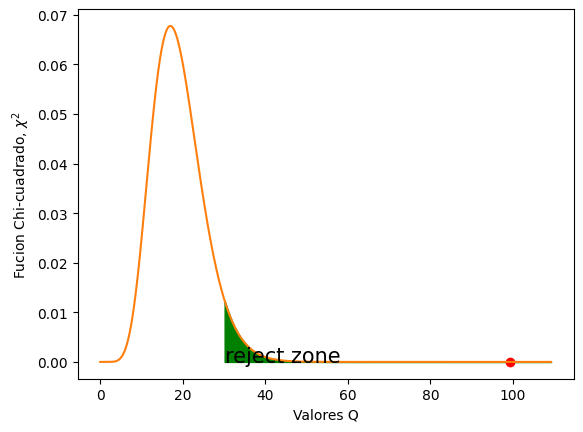

In [17]:
import scipy.stats

# encontramos el valor critico
alpha=0.05

critical_value = chi2.ppf(1-alpha, df=dof)
print("valor critico es \n", critical_value)

tail = Q+10  # para extendernos 10 unidades mas alla de Q
a = np.arange(0, tail, 0.001)  # abscisas

def mychi2(x, M):
    return chi2.pdf(x, df=M)

# sombrear el area bajo la curva
plt.fill_between(a, mychi2(a, dof), 0, 
                 where = (a > critical_value),
                 color='g');

yval=mychi2(Q, dof)


plt.xlabel("Valores Q")
plt.ylabel("Fucion Chi-cuadrado, $\chi^2$")

plt.plot(Q, 0, marker='o', markersize=6, markeredgecolor='red', \
         markerfacecolor='red')


plt.text(critical_value, 0, 'reject zone', fontsize=15)
plt.plot(a, mychi2(a, dof))
print("Q=", Q)

## Removemos la correlacion en los datos de forma que deberian ser independientes. Ahi si la hipotesis nula H0 se da. Es decir que los datos no tiene correlacion

### Encontramos la correlacion de los datos y su primer lag y la removemos.


In [18]:
# encontramos la correlacion usando NumPY
Xt = X[:-1]  # quitamos la ultima muestra para que la dimension de los datos sea compatible
Xtm1=X[1:]  # un deplazamiento (shift) por una unidad

Text(0, 0.5, 'X_t')

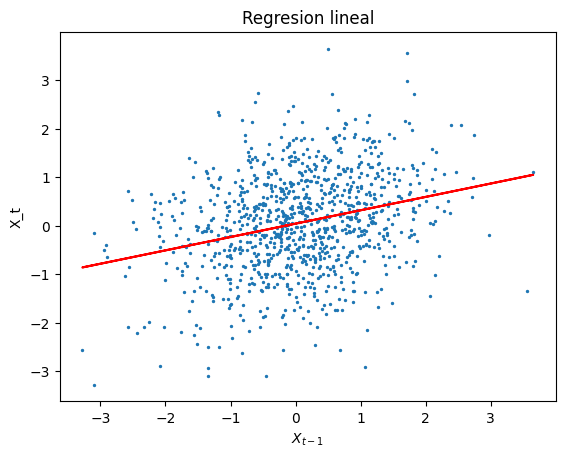

In [21]:
# usando NumPy
slope, intercept = np.polyfit(Xtm1, Xt, 1)
estimate = intercept + slope*Xtm1  # la recta de ajuste

# graficamos
plt.scatter(Xtm1, Xt, s=2)
plt.plot(Xtm1, estimate, c='r')
plt.title("Regresion lineal")
plt.xlabel("$X_{t-1}$")
plt.ylabel("X_t")


## Encontramos los residuales

Text(0.5, 1.0, 'residuales de AR(1) con $\\phi=0.3$ ')

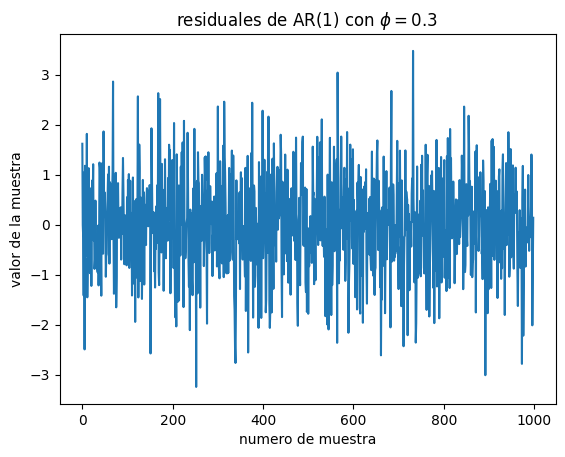

In [23]:
n=len(Xt)
res=np.zeros(n)
for i in range(n):
    res[i] = Xt[i] - intercept - slope*Xtm1[i]

# grafica
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.plot(res)
plt.title(f"residuales de AR(1) con $\phi={phi}$ ")



Text(0.5, 1.0, 'ACF de AR(1) con $\\phi=0.3$ ')

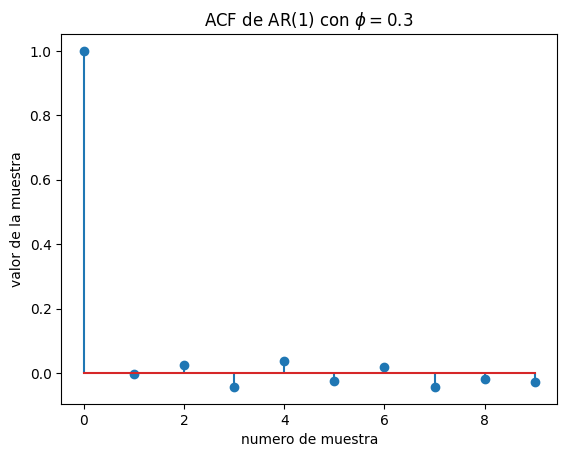

In [24]:
# hagamos el Q-statistics
M=10 # numero de lags que vamos a usar
rho2 = sm.tsa.acf(res)[0:M]  # la autocorrelacion usando statsmodels

# grafica
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.stem(rho2)
plt.title(f"ACF de AR(1) con $\phi={phi}$ ")

## calculamos los Q-statistics. Box-Pierce y Ljung-Box

In [28]:
dof = M-1
Q = N* sum( rho2[j]**2 for  j in range(1, M))


# calculamos el pvalue para alpha = 0.05
alpha=0.05
prob=1-alpha
critical = chi2.ppf(prob, dof) # me devuelve el Q para el que la probabilidad es 0.95


# el p-value
p = 1 - chi2.cdf(x=Q, df=dof)
print(p)

if p < alpha:
    print("it did not pass the null hypothesis test p=%f, alpha=%f"%(p,alpha))
    print("there are significant correlations between lags")
else: 
    print("it did  pass the null hypothesis test p=%f, alpha=%f"%(p,alpha))
    print("there are no significant correlations between lags")

print("Q value:", Q)



0.5499814091027037
it did  pass the null hypothesis test p=0.549981, alpha=0.050000
there are no significant correlations between lags
Q value: 7.843599115099381


## Verifiquemos directamente con ```statsmodels```


In [26]:
sm.stats.acorr_ljungbox(res, lags=[M], return_df=True, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
10,8.50806,0.579337,8.444201,0.585533


Ljung-Box test
degrees of freedom is  (p=M-1)

In [29]:
dof = M-1
Q = N*(N+2)*sum( rho2[j]**2/(N-j) for j in range(1,M))

# critical value
alpha=0.05
prob=1-alpha
critical = chi2.ppf(prob, dof)

# p value
p = 1 - chi2.cdf(x=Q, df=dof)
print(p)

if p < alpha:
    print("it did not pass the null hypothesis test p=%f, alpha=%f"%(p,alpha))
    print("there are significant correlations between lags")
else: 
    print("it did  pass the null hypothesis test p=%f, alpha=%f"%(p,alpha))
    print("there are no significant correlations between lags")

print("Q value:", Q)


0.5442468668295342
it did  pass the null hypothesis test p=0.544247, alpha=0.050000
there are no significant correlations between lags
Q value: 7.900074920949886


## Usando Ljung-Box de statsmodels

In [31]:
sm.stats.acorr_ljungbox(res, lags=[M], return_df=True)

,lb_stat,lb_pvalue
10,8.50806,0.579337


valor critico es 
 16.918977604620448
Q= 7.900074920949886


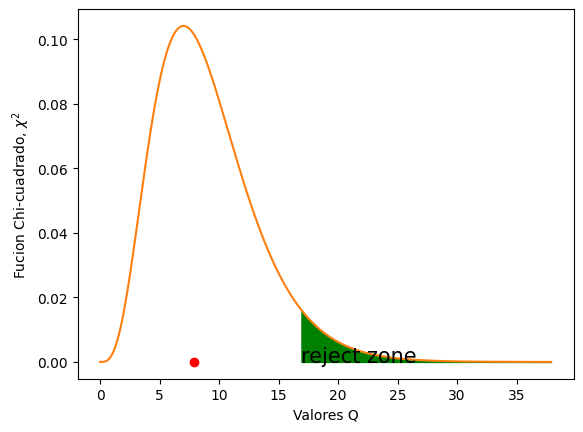

In [33]:
# encontramos el valor critico
alpha=0.05

critical_value = chi2.ppf(1-alpha, df=dof)
print("valor critico es \n", critical_value)

tail = Q+30  # para extendernos 10 unidades mas alla de Q
a = np.arange(0, tail, 0.001)  # abscisas

def mychi2(x, M):
    return chi2.pdf(x, df=M)

# sombrear el area bajo la curva
plt.fill_between(a, mychi2(a, dof), 0, 
                 where = (a > critical_value),
                 color='g');

yval=mychi2(Q, dof)


plt.xlabel("Valores Q")
plt.ylabel("Fucion Chi-cuadrado, $\chi^2$")

plt.plot(Q, 0, marker='o', markersize=6, markeredgecolor='red', \
         markerfacecolor='red')


plt.text(critical_value, 0, 'reject zone', fontsize=15)
plt.plot(a, mychi2(a, dof))
print("Q=", Q)

# Removing non-statinarity on time series



